Problem stattement 1

# a. Importing Necssary Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import SGD

# b. Load the training and testing data

In [2]:
train=pd.read_csv("train_data.csv")
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [3]:
test=pd.read_csv("test_data.csv")
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [4]:
x_train=train.drop(['label'],axis=1).values
x_train

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=int64)

In [5]:
x_train=x_train/255.0


In [6]:
y_train=train['label'].values
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=int64)

In [7]:
x_test=test.drop(['label'],axis=1).values
x_test

array([[158, 112,  49, ...,  21,  67, 110],
       [235, 235, 235, ..., 186, 200, 199],
       [158, 190, 222, ...,   7,   8,   7],
       ...,
       [ 20,  15,  12, ...,  25,  20,  47],
       [ 25,  40,  12, ...,  92, 120,  80],
       [ 73,  78,  75, ...,  27,  26,  26]], dtype=int64)

In [8]:
y_test=test['label'].values
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

# c. Define the network architecture using Keras

In [9]:
model=Sequential()

model.add(Dense(128,input_shape=(3072,),activation="relu")) #32*32*3
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

sgd=SGD(learning_rate=0.1,momentum=0.9,nesterov=0.1)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

# model = Sequential()

# model.add(Dense(128,activation='relu', input_shape=(3072,)))
# model.add(Dense(64,activation='relu', input_shape=(3072,)))
# model.add(Dense(32,activation='relu', input_shape=(3072,)))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation='softmax'))


# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# d. Train the model using SGD with 11 epochs

In [10]:
history=model.fit(x_train,y_train,validation_split=0.7,batch_size=512,epochs=11)

Epoch 1/11


30/30 [==============================] - 4s 116ms/step - loss: 2.4176 - accuracy: 0.1267 - val_loss: 2.2475 - val_accuracy: 0.1593
Epoch 2/11
30/30 [==============================] - 1s 21ms/step - loss: 2.1656 - accuracy: 0.1642 - val_loss: 2.1182 - val_accuracy: 0.1752
Epoch 3/11
30/30 [==============================] - 1s 23ms/step - loss: 2.1086 - accuracy: 0.1777 - val_loss: 2.1130 - val_accuracy: 0.1944
Epoch 4/11
30/30 [==============================] - 1s 18ms/step - loss: 2.0748 - accuracy: 0.1967 - val_loss: 2.0254 - val_accuracy: 0.2153
Epoch 5/11
30/30 [==============================] - 1s 18ms/step - loss: 2.0582 - accuracy: 0.2065 - val_loss: 2.1317 - val_accuracy: 0.1903
Epoch 6/11
30/30 [==============================] - 1s 18ms/step - loss: 2.0883 - accuracy: 0.1835 - val_loss: 2.4463 - val_accuracy: 0.1379
Epoch 7/11
30/30 [==============================] - 0s 15ms/step - loss: 2.0929 - accuracy: 0.1777 - val_loss: 2.1609 - val_accuracy: 0.1682
Epoch 8/11

# e. Evaluate the network

In [11]:
test_loss , test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 114.9791 - accuracy: 0.1701


# f. Plot the training loss and accuracy

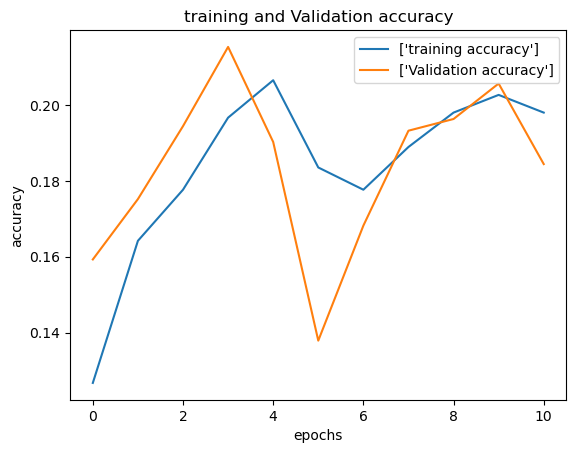

In [12]:
plt.plot(history.history['accuracy'],label=['training accuracy'])
plt.plot(history.history['val_accuracy'],label=['Validation accuracy'])
plt.title("training and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

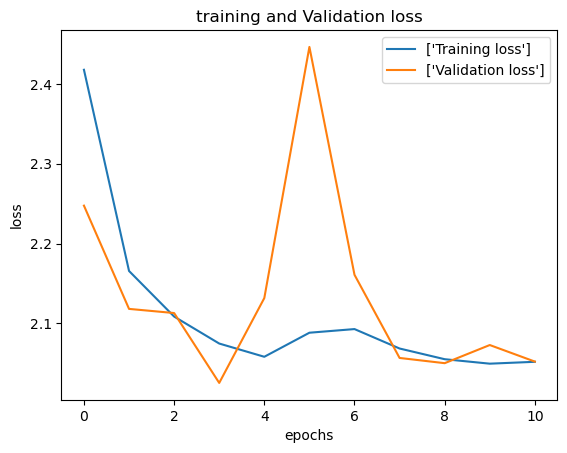

In [13]:
plt.plot(history.history['loss'],label=['Training loss'])
plt.plot(history.history['val_loss'],label=['Validation loss'])
plt.title("training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [14]:
pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [15]:
print(y_test)
print(np.argmax(pred,axis=1))

[3 8 8 ... 5 1 7]
[8 8 8 ... 6 6 1]


Predicted class:
8


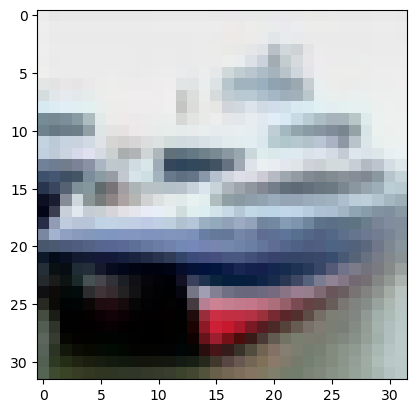

In [16]:
ind=1
plt.imshow(x_test[ind].reshape(32,32,3))
print("Predicted class:")
print(np.argmax(pred[ind]))